# 2nd part: Deep Learning applied on MNIST

### Starting the code

In [1]:
import tensorflow as tf
sess = tf.InteractiveSession()

# finish possible remaining session
sess.close()

#Start interactive session
sess = tf.InteractiveSession()

### The MNIST data

Using TensorFlow backend.


(50000, 28, 28) (50000,)


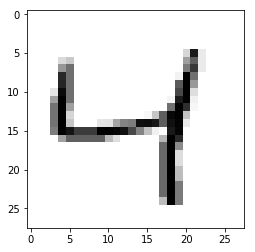

In [2]:
from preprocessed_mnist import load_dataset
# train, validation and test X image 28x28 Y answear
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[2], cmap="Greys");

### Initial parameters

In [3]:
width = 28 # width of the image in pixels 
height = 28 # height of the image in pixels
flat = width * height # number of pixels in one image 
class_output = 10 # number of possible classifications for the problem

### Input and output

In [4]:
x  = tf.placeholder(tf.float32, shape=[None, flat])
y_ = tf.placeholder(tf.float32, shape=[None, class_output])

#### Converting images of the data set to tensors

In [5]:
x_image = tf.reshape(x, [-1,28,28,1])  
x_image

<tf.Tensor 'Reshape:0' shape=(?, 28, 28, 1) dtype=float32>

### Convolutional Layer 1

In [6]:
W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev=0.1))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[32])) # need 32 biases for 32 outputs

In [7]:
convolve1= tf.nn.conv2d(x_image, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1

In [8]:
h_conv1 = tf.nn.relu(convolve1)

In [9]:
conv1 = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME') #max_pool_2x2
conv1

<tf.Tensor 'MaxPool:0' shape=(?, 14, 14, 32) dtype=float32>

First layer completed

### Convolutional Layer 2
#### Weights and Biases of kernels


In [10]:
W_conv2 = tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64])) #need 64 biases for 64 outputs

#### Convolve image with weight tensor and add biases.

In [11]:
convolve2= tf.nn.conv2d(conv1, W_conv2, strides=[1, 1, 1, 1], padding='SAME')+ b_conv2

#### Apply the ReLU activation Function

In [12]:
h_conv2 = tf.nn.relu(convolve2)

#### Apply the max pooling

In [13]:
conv2 = tf.nn.max_pool(h_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME') #max_pool_2x2
conv2

<tf.Tensor 'MaxPool_1:0' shape=(?, 7, 7, 64) dtype=float32>

### Fully Connected Layer

#### Flattening Second Layer

In [14]:
layer2_matrix = tf.reshape(conv2, [-1, 7*7*64])

#### Weights and Biases between layer 2 and 3


In [15]:
W_fc1 = tf.Variable(tf.truncated_normal([7 * 7 * 64, 1024], stddev=0.1))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024])) # need 1024 biases for 1024 outputs

#### Matrix Multiplication (applying weights and biases)

In [16]:
fcl=tf.matmul(layer2_matrix, W_fc1) + b_fc1

#### Apply the ReLU activation Function

In [17]:
h_fc1 = tf.nn.relu(fcl)
h_fc1

<tf.Tensor 'Relu_2:0' shape=(?, 1024) dtype=float32>

Third layer completed

#### Dropout Layer, Optional phase for reducing overfitting


In [18]:
keep_prob = tf.placeholder(tf.float32)
layer_drop = tf.nn.dropout(h_fc1, keep_prob)
layer_drop

<tf.Tensor 'dropout/mul:0' shape=(?, 1024) dtype=float32>

###  Readout Layer (Softmax Layer)

    
#### Weights and Biases


In [19]:
W_fc2 = tf.Variable(tf.truncated_normal([1024, 10], stddev=0.1)) #1024 neurons
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10])) # 10 possibilities for digits [0,1,2,3,4,5,6,7,8,9]

#### Matrix Multiplication (applying weights and biases)

In [20]:
fc=tf.matmul(layer_drop, W_fc2) + b_fc2

#### Apply the Softmax activation Function


In [21]:
y_CNN= tf.nn.softmax(fc)
y_CNN

<tf.Tensor 'Softmax:0' shape=(?, 10) dtype=float32>

# Model

In [22]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_CNN), reduction_indices=[1]))

#### Define the optimizer


In [23]:
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

#### Define prediction


In [24]:
correct_prediction = tf.equal(tf.argmax(y_CNN,1), tf.argmax(y_,1))

#### Define accuracy


In [25]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#### Run session, train

In [26]:
sess.run(tf.global_variables_initializer())

*If you want a fast result (**it might take sometime to train it**)*

In [27]:
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)
print(X_train_flatten.shape, X_test_flatten.shape)


(50000, 784) (10000, 784)


In [28]:
# MPS own external code
# convert to one-hot encooding
import numpy as np
y_train = np.eye(class_output)[y_train]
y_test = np.eye(class_output)[y_test]

In [29]:
for i in range(1000):
    batch_size = 100
    if i%100 == 0:
        train_accuracy = accuracy.eval(feed_dict={
            x:X_train_flatten[i:i+batch_size], y_:y_train[i:i+batch_size], keep_prob: 1.0})
        test_accuracy = accuracy.eval(feed_dict={
            x:X_test_flatten[i:i+batch_size], y_: y_test[i:i+batch_size], keep_prob: 1.0})
        print("step %d, training accuracy %g"%(i, train_accuracy))
        print("step %d, test accuracy %g"%(i, test_accuracy))
    train_step.run(feed_dict={x:X_train_flatten[i:i+batch_size], y_: y_train[i: i+batch_size], keep_prob: 0.5})

step 0, training accuracy 0.11
step 0, test accuracy 0.11
step 100, training accuracy 0.94
step 100, test accuracy 0.71
step 200, training accuracy 1
step 200, test accuracy 0.8
step 300, training accuracy 1
step 300, test accuracy 0.84
step 400, training accuracy 0.98
step 400, test accuracy 0.8
step 500, training accuracy 1
step 500, test accuracy 0.79
step 600, training accuracy 0.99
step 600, test accuracy 0.91
step 700, training accuracy 1
step 700, test accuracy 0.87
step 800, training accuracy 1
step 800, test accuracy 0.92
step 900, training accuracy 1
step 900, test accuracy 0.85


# Evaluate the model
Print the evaluation to the user

In [30]:
print("test accuracy %g"%accuracy.eval(feed_dict={x: X_test_flatten, y_: y_test, keep_prob: 1.0}))

test accuracy 0.9101
